# **Desarrollo Parcial 3**

**Objetivo**: El objetivo de esta actividad es construir un sistema de aprendizaje
no supervisado que permita saber a qué segmentos de clientes debo
ofrecerles un nuevo producto cuyo costo es de 5000.



> **Isabella Ceballos y Juan José Restrepo**



## **Pre-Procesamiento**



1.   **Importar Data**



La data está conformado por un
conjunto de clientes, cada uno de ellos representado a partir de un conjunto
básico de información, incluyendo su ID, edad, género, ingresos anuales y
puntaje de gastos (relacionado con cuánto compra la persona).

**Importante**: La columna **Ingresos Anuales** está en miles.

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

In [ ]:
url="/content/Mall_Customers.csv.xls"
data = pd.read_csv(url, header=None, na_values=" ?")

# Se definen el nuevo nombre de las columnas
data.columns = ['ID', 'Genero', 'Edad', 'Ingresos Anuales (miles)', 'Porcentaje Consumo']

# Se eliminan las columnas originales ya que se renombraron
data = data.drop(index=0,inplace=False) 
clientes = data['ID']

# Se eliminan las columna ID ya que no es relevante en el contexto
data = data.drop(columns='ID',inplace=False) 

data

,Genero,Edad,Ingresos Anuales (miles),Porcentaje Consumo
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74
199,Male,32,137,18


In [ ]:
data.dtypes

Genero                      object
Edad                        object
Ingresos Anuales (miles)    object
Porcentaje Consumo          object
dtype: object

Como todos nos aparecen de tipo objeto, procedemos a hacer la conversión de los atributos **ID,Edad, Ingresos y Porcentaje Consumo** a **int**

In [ ]:
numericas = ['Edad', 'Ingresos Anuales (miles)', 'Porcentaje Consumo']
for i in numericas:
  data[i] = data[i].astype(str).astype(int)

data.dtypes

Genero                      object
Edad                         int64
Ingresos Anuales (miles)     int64
Porcentaje Consumo           int64
dtype: object

2.  **Análisis Estadístico**

<ipython-input-159-2a6779451496>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

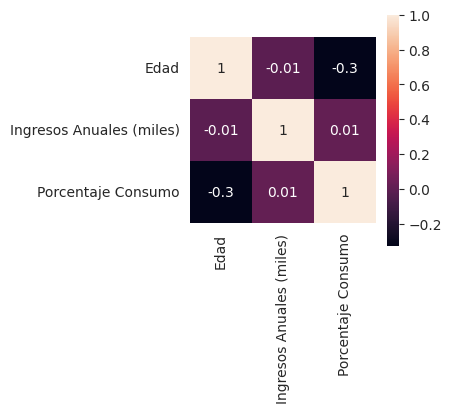

In [ ]:
# Datos numéricos
fig, ax = plt.subplots(figsize=(3,3))

sns.heatmap(data.corr(), square=True, annot=True, ax=ax,fmt=".1g")

A partir de las correlaciones entre atributos, se determina que no se debe de eliminar ningun atributo ya que no presentan los mismos datos

In [ ]:
#Medidas de centralidad y desviación para atributos numéricos:
data.describe()

,Edad,Ingresos Anuales (miles),Porcentaje Consumo
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


A partir de esto, y con una primera imagen, se puede decir que como el mínimo de **ingresos es 15 mil**, entonces todos podrían optar por la compra del nuevo producto. Pero, eso dependerá del **porcentaje de consumo del cliente**.



> Validar datos Nan o Nulls



In [ ]:
data.isnull().sum()

Genero                      0
Edad                        0
Ingresos Anuales (miles)    0
Porcentaje Consumo          0
dtype: int64

A partir de esto, podemos ver que no se presentan datos nulos en la data



> Datos atípicos

**En esta sección no consideramos los datos atípicos, dado que la información que brindan los atributos, no se considaría atípica ya que es aplicada a un contexto real, es decir, no es que haya algún error en la medida o algun caso inusual.**





> Diagrama de Cajas

Este se realiza con el fin de evaluar el ingreso anual y porcentaje consumo para visualizar el rango de distribución de ambos.



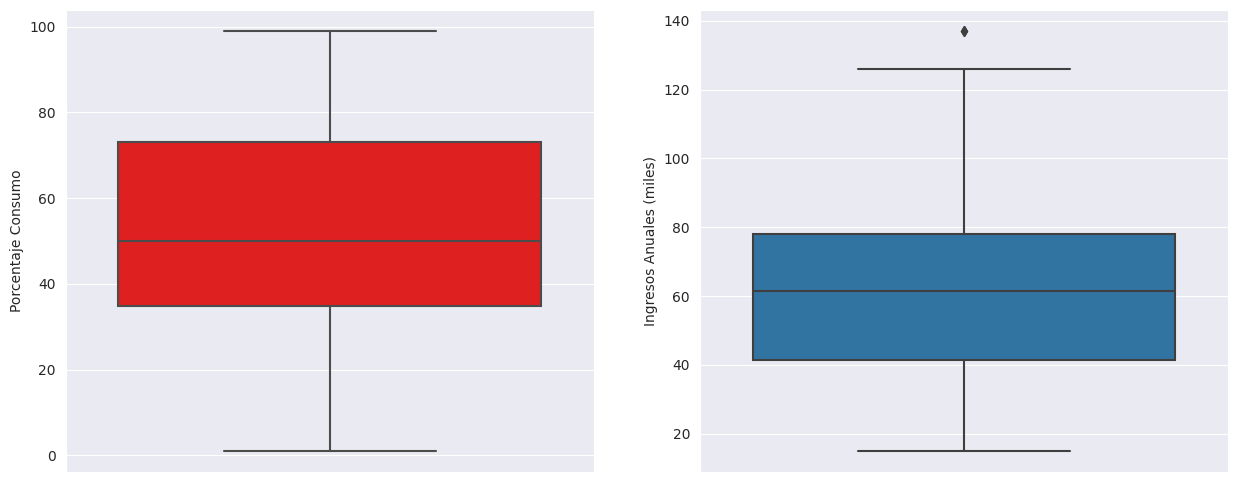

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=data['Porcentaje Consumo'], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=data['Ingresos Anuales (miles)'])
plt.show()

Dado esto, se puede concluir que el rango de **porcentaje consumo** es mayor que el rango de **ingresos anuales**



> Análisis de Género



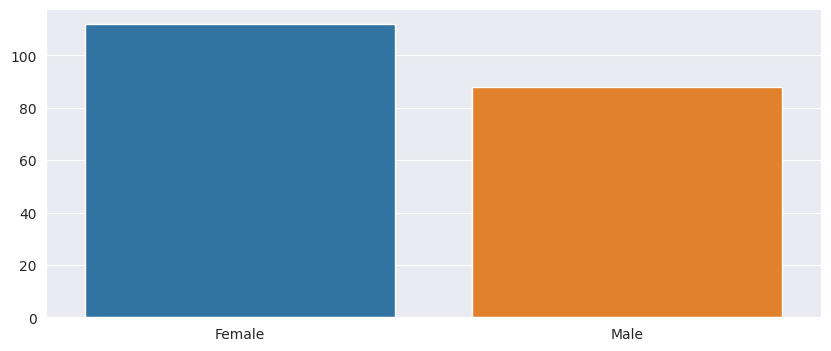

In [ ]:
generos = data.Genero.value_counts()

sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=generos.index, y=generos.values)
plt.show()

De lo anterior podemos concluir que las **mujeres** superan en cantidad a los **hombres** en la data presentada.



> Análisis de atributo Edad



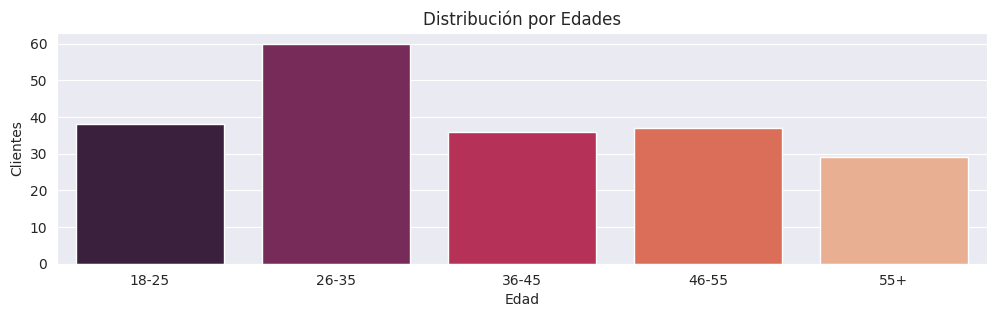

In [ ]:
edad18_25 = data.Edad[(data.Edad <= 25) & (data.Edad >= 18)]
edad26_35 = data.Edad[(data.Edad <= 35) & (data.Edad >= 26)]
edad36_45 = data.Edad[(data.Edad <= 45) & (data.Edad >= 36)]
edad46_55 = data.Edad[(data.Edad <= 55) & (data.Edad >= 46)]
edadM55 = data.Edad[data.Edad >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(edad18_25.values),len(edad26_35.values),len(edad36_45.values),len(edad46_55.values),len(edadM55.values)]

plt.figure(figsize=(12,3))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Distribución por Edades")
plt.xlabel("Edad")
plt.ylabel("Clientes")
plt.show()

A partir de esto, es notorio que los clientes que se encuentran entre 26 y 35 años de edad, son los que más se presentan en la data.



> Cantidad de clientes según su porcentaje de gastos



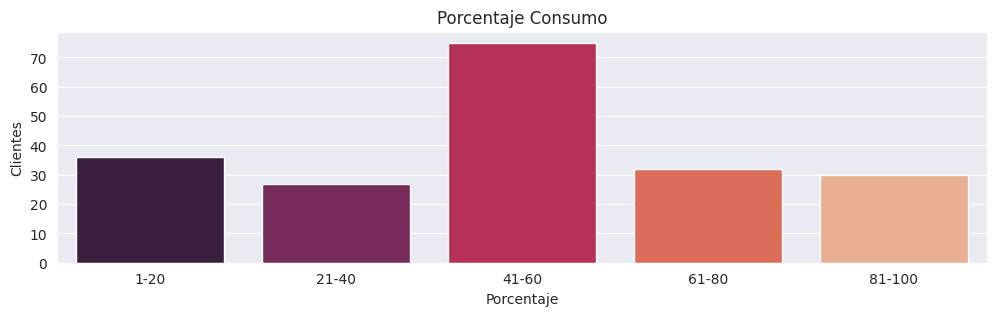

In [ ]:
ss1_20 = data["Porcentaje Consumo"][(data["Porcentaje Consumo"] >= 1) & (data["Porcentaje Consumo"] <= 20)]
ss21_40 = data["Porcentaje Consumo"][(data["Porcentaje Consumo"] >= 21) & (data["Porcentaje Consumo"] <= 40)]
ss41_60 = data["Porcentaje Consumo"][(data["Porcentaje Consumo"] >= 41) & (data["Porcentaje Consumo"] <= 60)]
ss61_80 = data["Porcentaje Consumo"][(data["Porcentaje Consumo"] >= 61) & (data["Porcentaje Consumo"] <= 80)]
ss81_100 = data["Porcentaje Consumo"][(data["Porcentaje Consumo"] >= 81) & (data["Porcentaje Consumo"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(12,3))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Porcentaje Consumo")
plt.xlabel("Porcentaje")
plt.ylabel("Clientes")
plt.show()

De esto, podemos decir que la mayoría de los clientes tienen un porcentaje de consumo entre el **41 y 60 %**



> Clientes según sus ingresos anuales



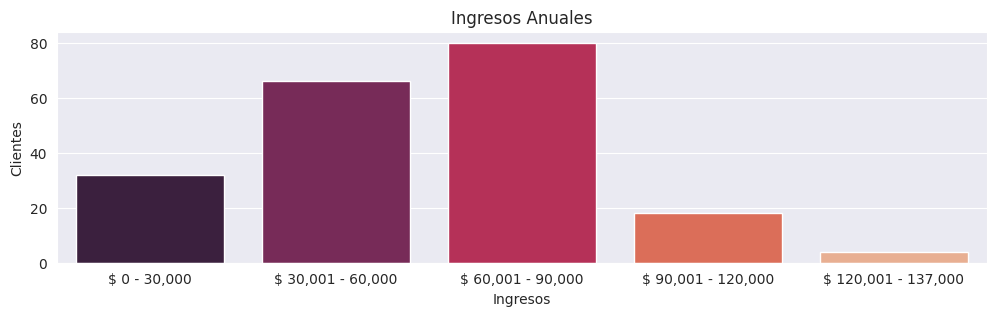

In [ ]:
ai0_30 = data["Ingresos Anuales (miles)"][(data["Ingresos Anuales (miles)"] >= 0) & (data["Ingresos Anuales (miles)"] <= 30)]
ai31_60 = data["Ingresos Anuales (miles)"][(data["Ingresos Anuales (miles)"] >= 31) & (data["Ingresos Anuales (miles)"] <= 60)]
ai61_90 = data["Ingresos Anuales (miles)"][(data["Ingresos Anuales (miles)"] >= 61) & (data["Ingresos Anuales (miles)"] <= 90)]
ai91_120 = data["Ingresos Anuales (miles)"][(data["Ingresos Anuales (miles)"] >= 91) & (data["Ingresos Anuales (miles)"] <= 120)]
ai121_137 = data["Ingresos Anuales (miles)"][(data["Ingresos Anuales (miles)"] >= 121) & (data["Ingresos Anuales (miles)"] <= 137)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 137,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_137.values)]

plt.figure(figsize=(12,3))
sns.barplot(x=aix, y=aiy, palette="rocket")
plt.title("Ingresos Anuales")
plt.xlabel("Ingresos")
plt.ylabel("Clientes")
plt.show()

A partir de esto, la mayoría de los clientes presenta ingresos anuales entre **60 mil y 90 mil**



> Creación Atributo Consumo

Esto lo hicimos para poder ver qué clientes pueden optar por la compra del nuevo producto, dado al dinero que ellos disponen para **consumir**



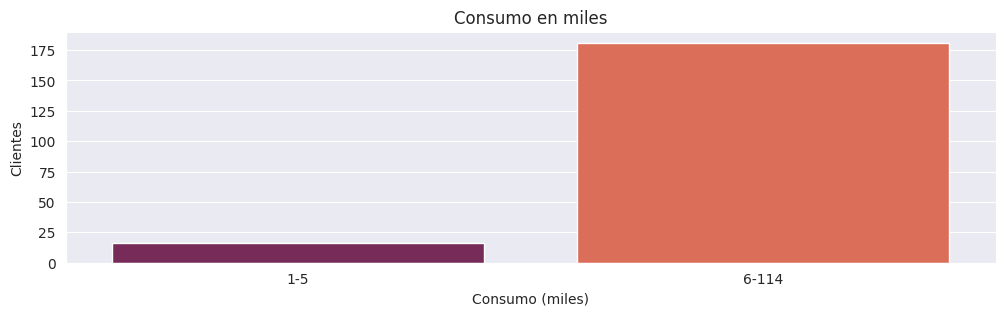

Catidad de clientes con consumos anuales mayores a 5 mil: 181


In [ ]:
data['Consumo (miles)'] = (data['Ingresos Anuales (miles)']*data['Porcentaje Consumo'])/100

C5 = data['Consumo (miles)'][(data['Consumo (miles)'] >= 0) & (data['Consumo (miles)'] <= 5)]
C5M = data['Consumo (miles)'][(data['Consumo (miles)'] >= 6)]


ssx = ["1-5", "6-114"]
ssy = [len(C5.values), len(C5M.values)]

plt.figure(figsize=(12,3))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Consumo en miles")
plt.xlabel("Consumo (miles)")
plt.ylabel("Clientes")
plt.show()

print("Catidad de clientes con consumos anuales mayores a 5 mil:",len(C5M.values))

A partir de la gráfica de barras, se concluye que la mayoría de clientes (**181**), tienen un consumo mayor a 5 mil. **Lo que posibilita que a estos clientes se les puede ofrecer el nuevo producto.**



> Codificar variables categóricas



In [ ]:
data = pd.get_dummies(data)

# Se borra genero Male, dado que las dos columnas expresan lo mismo, en caso dado cuando Genero_Female sea 0 es porque es Male
data = data.drop(columns='Genero_Male',inplace=False) 



> Normalizar los datos



In [ ]:
scale = StandardScaler()
numericas = ['Edad', 'Ingresos Anuales (miles)', 'Porcentaje Consumo','Consumo (miles)'] 
data_norm = data.copy()
data_norm[numericas] = scale.fit_transform(data_norm[numericas])
data_norm

,Edad,Ingresos Anuales (miles),Porcentaje Consumo,Consumo (miles),Genero_Female
1,-1.424569,-1.738999,-0.434801,-1.077128,0
2,-1.281035,-1.738999,1.195704,-0.801479,0
3,-1.352802,-1.700830,-1.715913,-1.291084,1
4,-1.137502,-1.700830,1.040418,-0.794041,1
5,-0.563369,-1.662660,-0.395980,-1.035562,1
...,...,...,...,...,...
196,-0.276302,2.268791,1.118061,2.814769,1
197,0.441365,2.497807,-0.861839,0.210545,1
198,-0.491602,2.497807,0.923953,2.746513,0
199,-0.491602,2.917671,-1.250054,-0.254120,0


## **Definiciones funciones para el Clustering**

### **Función para encontrar el ID Cliente**

In [ ]:
def encontrar_cliente(data,cluster):

  print('-----------------------------------------------------')
  for i in range(cluster):
    cliente = data[data["cluster"]==i]
    print("Número de clientes en el clúster",i+1,"=", len(cliente))
    print('Los ID cliente son:', cliente['ID'].values)
    print('-----------------------------------------------------')

### **Funciones para graficar**

In [ ]:
# Funcion para graficar el resultado del clustering
def graficar (data,titulo,p,C,medias):
  fig = plt.figure(figsize=(20,5))

  colores =['blue','red','green','yellow','purple']
  
  n = 0

  if p == 3:
    ax = fig.add_subplot(121, projection='3d')
    ax.view_init(30, 185)
    ax.set_title(titulo)
    ax.set_xlabel("Edad")
    ax.set_ylabel("Ingresos Anuales (miles)")
    ax.set_zlabel('Porcentaje Consumo')

    for i in colores:
      ax.scatter(data['Edad'][data.cluster == n],data['Ingresos Anuales (miles)'][data.cluster == n],data['Porcentaje Consumo'][data.cluster == n],c=i,s=60,label='Cluster '+str(n+1))
      n+=1
    
    if medias == True:
      ax.scatter(C[:, 0], C[:, 1],C[:, 2],marker="x", s = 60, color = 'black')
  
  else:
    ax = fig.add_subplot()
    ax.set_title(titulo)
    ax.set_xlabel("Ingresos Anuales (miles)")
    ax.set_ylabel('Porcentaje Consumo')

    for i in colores:
      ax.scatter(data['Ingresos Anuales (miles)'][data.cluster == n],data['Porcentaje Consumo'][data.cluster == n],c=i,s=60,label='Cluster '+str(n+1))
      n+=1

    if medias == True:
      ax.scatter(C[:, 0], C[:, 1],marker="x", s = 60, color = 'black',label='Centroides')
      
  plt.legend()
  plt.show()

In [ ]:
# Funcion para graficar el resultado del clustering dinámico 3D
def graficar3D(data,titulo):
  fig = px.scatter_3d(data, x='Edad', y='Ingresos Anuales (miles)', z='Porcentaje Consumo', color='cluster')
  fig.update_layout(scene=dict(
        xaxis_title='Edad',
        yaxis_title='Ingresos Anuales (miles)',
        zaxis_title='Porcentaje Consumo'),
        title=titulo
    )
  fig.show()

In [ ]:
# Funcion para graficar métodos de tunning

def graficar_metodos (silueta,inercia):
  fig = plt.figure(figsize=(12,3))
  ax = fig.subplots(1, 2)

  ax[0].set_title('Método de Silueta')
  ax[0].set_xlabel('No. de clusters')
  ax[0].set_ylabel('Silueta')
  x= list(range(2, 20))
  ax[0].plot(x, silueta, marker='o')

  ax[1].set_title('Método del Codo')
  ax[1].set_xlabel('No. de clusters')
  ax[1].set_ylabel('Inercia')
  ax[1].plot(list(range(1, 20)), inercia, marker='o')
 
  plt.show()



### **Definición K medias**

*   Clasificación dura
*   Estructura circular



In [ ]:
# Coeficiente de silueta para determinar el k óptimo
from sklearn.metrics import silhouette_score

def silueta(X):
  silueta = []
  
  for k in range(2, 20):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silueta.append(score)
    
  x= list(range(2, 20))
  num = silueta.index(np.max(silueta))
  print(" El valor a usar de n_clusters es:",x[num])

  return(silueta)

In [ ]:
# Regla del codo para determinar el k óptimo
def inercia(X):
  inercia =[]
  for i in range(1, 20):
    cod = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    cod.fit(X)
    #Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(cod.inertia_)

  return(inercia)

In [ ]:
from sklearn.cluster import KMeans

def kmedias(data,k):
  kmedia = KMeans(n_clusters = k, init = 'k-means++', 
                   max_iter = 300, n_init = 10)
  kmedia.fit(data)
  C, etiquetas = kmedia.cluster_centers_, kmedia.labels_
  data["cluster"]= etiquetas
  return (C)

### **Mezcla Gaussiana**

*   Probabilidad de pertenecer al cluster
*   Clasificación suave
*   Estructuras como elipses







In [ ]:
# Tunning del modelo GMM
# ==============================================================================
def tunning(X):
  fig, ax = plt.subplots(figsize=(6, 3.84))

  n_components = range(1, 40)
  covariance_types = ['spherical', 'tied', 'diag', 'full']
  min = 9999999
  for covariance_type in covariance_types:
      valores_bic = []

      for i in n_components:
          modelo = GMM(n_components=i, covariance_type=covariance_type)
          modelo = modelo.fit(X)
          valores_bic.append(modelo.bic(X))
          
      ax.plot(n_components, valores_bic, label=covariance_type)
      num = np.min(valores_bic)
      
      if num < min :
        min = num
        indice = valores_bic.index(min)
        val = n_components[indice]
          
  ax.set_title("Valores BIC")
  ax.set_xlabel("Número componentes")
  ax.legend();

  print(" El valor a usar de n_components es:",val)

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

def ggm (data,k,type):
  gmm = GMM(n_components=k,covariance_type=type,random_state=123)
  gmm.fit(data)

  etiquetas = gmm.fit(data).predict(data)
  data["cluster"]=etiquetas



## **Clustering**



### **Kmedias**

#### **3 atributos : Ingresos anual, Edad y Porcentaje Consumo**

In [ ]:
data_norm = data_norm.drop(columns=['Genero_Female','Consumo (miles)'],inplace=False)
data_medias = data.drop(columns=['Genero_Female','Consumo (miles)'],inplace=False)

 El valor a usar de n_clusters es: 6


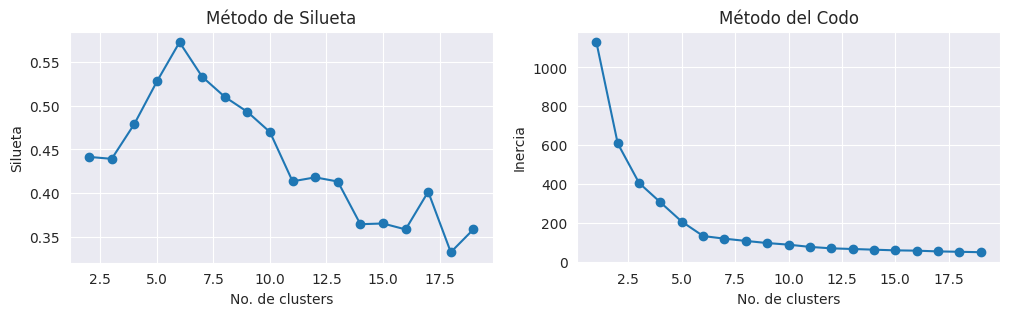

In [ ]:
# Se calcula la inercia y la silueta, para definir el k mas óptimo
s = silueta(data_norm)
i = inercia(data_norm)
graficar_metodos (s,i)

 El valor a usar de n_clusters es: 6


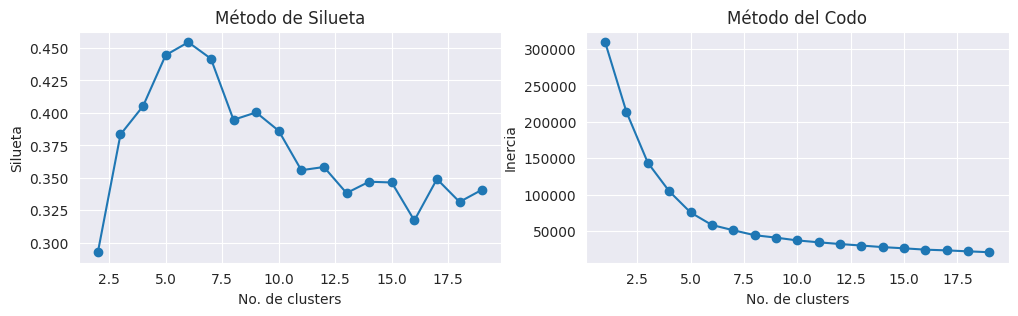

In [ ]:
# Se calcula la inercia y la silueta, para definir el k mas óptimo
s = silueta(data_medias)
i = inercia(data_medias)
graficar_metodos (s,i)

Se decidió implementar los 2 métodos para encontrar el k más **óptimo**, dado que queríamos evaluar las diferencias. Dado esto, se concluyó es mucho más simple lograr definir el k, con el método de **silueta** debido a que sólo se busca el k que consigue el valor más alto.

In [ ]:
# Se plantea el modelo kmedias a partir del k obtenido
C = kmedias(data_norm,6)
C1 = kmedias(data_medias,6)

> **Desventaja de data normalizada**

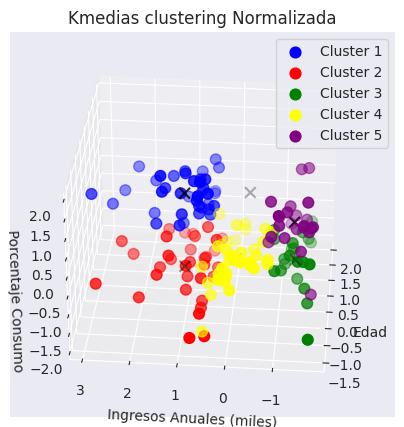

In [ ]:
graficar(data_norm,'Kmedias clustering Normalizada',3,C,True)

A partir de esto, nos dimos cuenta que es más complejo analizar el cluster cuando los datos se encuentran **normalizados**, por ende, de aquí en adelante, se hará sin normalizar los datos, para lograr obtener un mejor entendimiento de los resultados dado a que los valores en los ejes son expresados por sus valores originales y no por una **normalización de ellos**

#### **2 atributos : Ingresos anual y Porcentaje Consumo**

In [ ]:
data_medias2 = data.drop(columns=['Genero_Female','Consumo (miles)','Edad'],inplace=False)

 El valor a usar de n_clusters es: 5


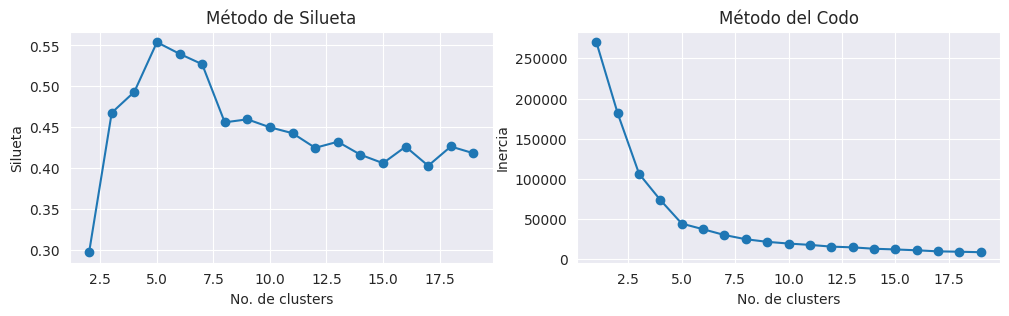

In [ ]:
# Se calcula la inercia y la silueta, para definir el k mas óptimo
s = silueta(data_medias2)
i = inercia(data_medias2)
graficar_metodos (s,i)

In [ ]:
# Se plantea el modelo kmedias a partir del k obtenido
C2= kmedias(data_medias2,5)

### **Mezcla Gaussiana**

#### **3 atributos : Ingresos anual, Edad y Porcentaje Consumo**

 El valor a usar de n_components es: 5


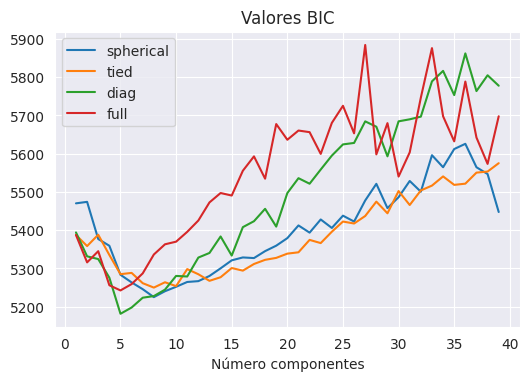

In [ ]:
data_ggm = data.drop(columns=['Genero_Female','Consumo (miles)'],inplace=False)

tunning(data_ggm)

A partir del tunning realizado, se concluye que el n_components debe ser **5**, y el tipo de covarianza que consigue este valor es la **diag**.

In [ ]:
# Se plantea el modelo de mezcla gaussiana dado al tunning
ggm(data_ggm,5,'diag')

#### **2 atributos : Ingresos anual y Porcentaje Consumo**

 El valor a usar de n_components es: 5


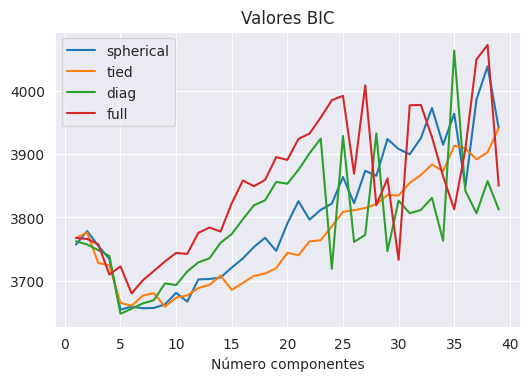

In [ ]:
data_ggm2 = data.drop(columns=['Genero_Female','Consumo (miles)','Edad'],inplace=False)

tunning(data_ggm2)

A partir del tunning realizado, se concluye que el n_components debe ser **5**, y el tipo de covarianza que consigue este valor es la **diag**.

In [ ]:
# Se plantea el modelo de mezcla gaussiana a partir del tunning
ggm(data_ggm2,5,'diag')

## **Conclusiones de Kmedias y Mezcla Gaussiana**

### **2 Atributos : Ingresos y Porcentaje Consumo**

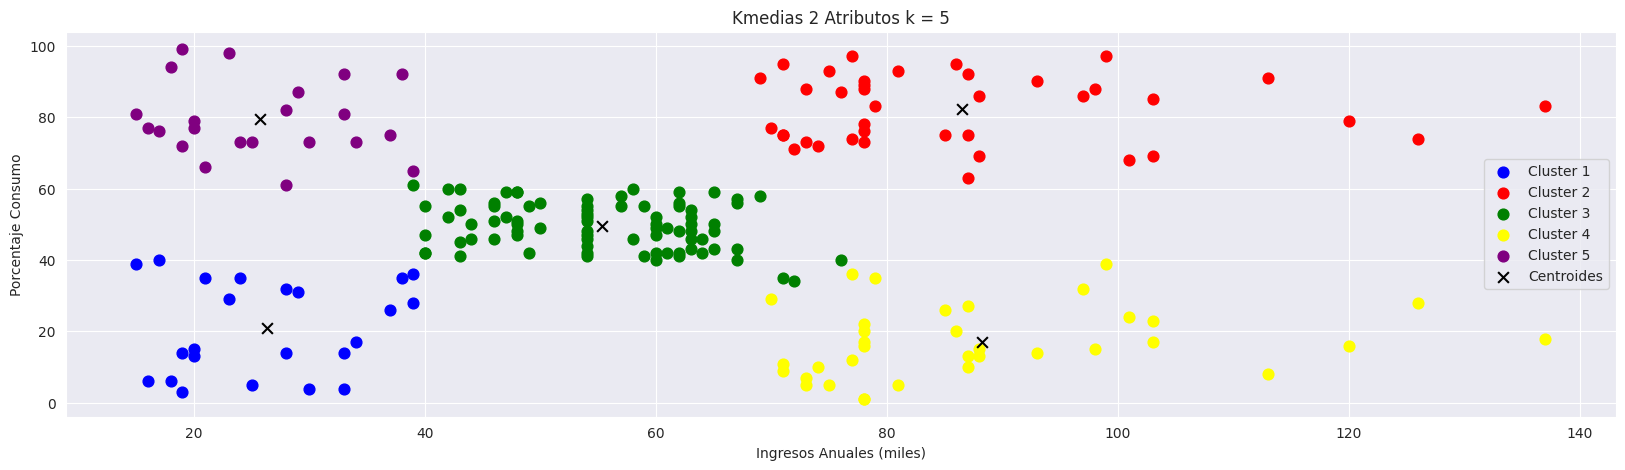

In [ ]:
graficar(data_medias2,'Kmedias 2 Atributos k = 5',2,C2,True)

Podemos ver claramente que se han formado 5 grupos diferentes a partir de los datos.

Estos grupos son:

1.   **Azul:** Bajo ingreso anual, y bajo porcentaje de consumo.
2.   **Morado:** Alto porcentaje de consumo y bajo ingreso anual.
3.   **Verde:** Promedio de ingreso anual y porcentaje consumo.
4.   **Amarillo:** Alto ingreso anual y bajo porcentaje de consumo.
5.   **Rojo:** Alto ingreso anual y alto porcentaje de consumo.

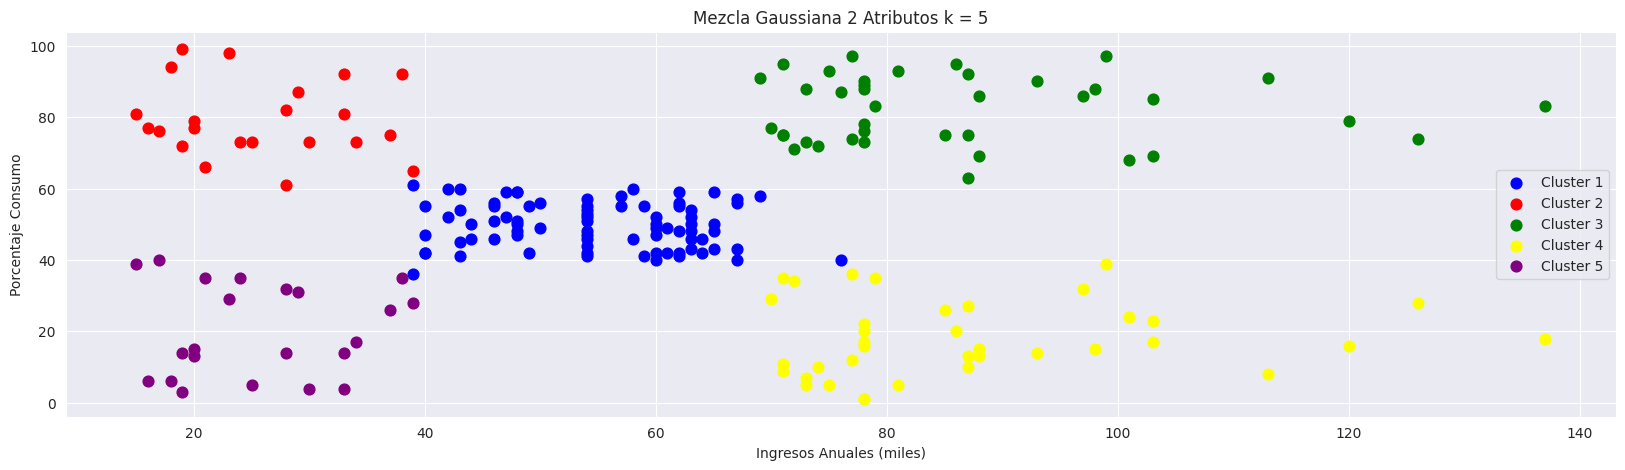

In [ ]:
graficar(data_ggm2,'Mezcla Gaussiana 2 Atributos k = 5',2,0,False)

Del mismo modo, se han formado 5 grupos diferentes a partir de los datos.

Estos grupos son:



1.   **Morado:** Bajo ingreso anual, y bajo porcentaje de consumo.
2.   **Rojo:** Alto porcentaje de consumo y bajo ingreso anual.
3.   **Azul:** Promedio de ingreso anual y porcentaje consumo.
4.   **Amarillo:** Alto ingreso anual y bajo porcentaje de consumo.
5.   **Verde:** Alto ingreso anual y alto porcentaje de consumo.



> **Comparación entre resultado de Kmedias y Mezcla Gaussiana**

Al analizar los dos clustering, se detalló que en la **Mezcla Gaussiana** se segmentó mejor en cuanto al clúster de la mitad ( Azul: Gaussiana, Verde: KMedias), dado que sólo 1 dato se puede considerar que pertenecía era al clúster amarillo. Pero en cambio en **Kmedias**, fueron 3 datos los que no harían parte de ese clúster si no del amarillo.





> **Conclusión Final con 2 Atributos**

Dado el objetivo establecido y basándonos en el modelo de **Mezcla Gaussiana**, principalmente recomendaría a la empresa enfocarse en los segmentos de color **rojo,verde y azul**, donde se tendría una gran probalidad de que el cliente acepte el producto, dado sus ingresos y porcentaje de consumo.

Por otro lado, con respecto a los clientes que pertenecen a los segmentos **morado y amarillo**, tienen mayor probabilidad de que no deseen adquirir el producto, más no quiere decir que al indagar detalladamente en estos clientes no exista la posibilidad de que al menos uno decida adquirir el producto.

**A continuación se mostraran los clientes y su ID correspondiente según la segmentación hecha en Mezcla Gaussiana. Esto con el fin, de conocer a quiénes podemos contactar.**



In [ ]:
data_ggm2['ID']= clientes
encontrar_cliente(data_ggm2,5)

-----------------------------------------------------
Número de clientes en el clúster 1 = 80
Los ID cliente son: ['43' '44' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99' '100'
 '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123' '143']
-----------------------------------------------------
Número de clientes en el clúster 2 = 39
Los ID cliente son: ['124' '126' '128' '130' '132' '134' '136' '138' '140' '142' '144' '146'
 '148' '150' '152' '154' '156' '158' '160' '162' '164' '166' '168' '170'
 '172' '174' '176' '178' '180' '182' '184' '186' '188' '190' '192' '194'
 '196' '198' '200']
-----------------------------------------------------
Número de clientes en el clúster 3 = 37
Los ID 

### **3 Atributos: Edad, Ingresos y Porcentaje Consumo**

In [ ]:
graficar3D(data_medias,'Kmedias 3 Atributos k =6')

Podemos ver claramente que se han formado 6 grupos diferentes a partir de los datos.

Estos grupos son:

1.   **Clúster 1 Azul:** Alto ingreso anual, y bajo porcentaje de consumo.
2.   **Clúster 2 Morado:** Promedio porcentaje de consumo y medio bajo ingreso anual.
3.   **Clúster 3 Fucsia:** Promedio porcentaje de consumo y medio bajo ingreso anual.
4.   **Clúster 4 Salmón:** Alto ingreso anual y Alto porcentaje de consumo.
5.   **Clúester 5 Naranja:** Bajo ingreso anual y Alto porcentaje de consumo.
6.   **Clúster 6 Amarillo:** Bajo ingreso anual y Bajo porcentaje de consumo.

In [ ]:
# Edades
for i in range(6):
  edad_min = data_medias['Edad'][data_medias["cluster"]==i].min()
  edad_max = data_medias['Edad'][data_medias["cluster"]==i].max()
  print("El clúster",i+1,"tiene rangos de edad entre:",edad_min,"-",edad_max)

El clúster 1 tiene rangos de edad entre: 43 - 70
El clúster 2 tiene rangos de edad entre: 27 - 40
El clúster 3 tiene rangos de edad entre: 19 - 59
El clúster 4 tiene rangos de edad entre: 18 - 35
El clúster 5 tiene rangos de edad entre: 18 - 40
El clúster 6 tiene rangos de edad entre: 19 - 67


In [ ]:
graficar3D(data_ggm,'Mezcla Gaussiana 3 Atributos k = 5')

Podemos ver claramente que se han formado 5 grupos diferentes a partir de los datos.

Estos grupos son:

1.   **Clúster 1 Azul:** Medio ingreso anual, y Medio porcentaje de consumo.
2.   **Clúster 2 Morado:** Alto porcentaje de consumo y Alto ingreso anual.
3.   **Clúster 3 Fucsia:** Alto porcentaje de consumo y Bajo ingreso anual.
4.   **Clúester 4 Naranja:** Alto ingreso anual y Bajo porcentaje de consumo.
5.   **Clúster 5 Amarillo:** Bajo ingreso anual y Bajo porcentaje de consumo.

In [ ]:
# Edades
for i in range(5):
  edad_min = data_ggm['Edad'][data_ggm["cluster"]==i].min()
  edad_max = data_ggm['Edad'][data_ggm["cluster"]==i].max()
  print("El clúster",i+1,"tiene rangos de edad entre:",edad_min,"-",edad_max)

El clúster 1 tiene rangos de edad entre: 18 - 70
El clúster 2 tiene rangos de edad entre: 27 - 40
El clúster 3 tiene rangos de edad entre: 19 - 67
El clúster 4 tiene rangos de edad entre: 19 - 59
El clúster 5 tiene rangos de edad entre: 18 - 35



> **Comparación entre resultado de Kmedias y Mezcla Gaussiana**

Al analizar los dos clustering, se concluye que ambos presentan bien la segmentación, pero si se desea analizar a profundidad las **edades**, el modelo de **kmedias**, logra segmentar con un clúster más esas edades, lo que a comparación de **Mezcla Gaussiana**, toma esas dos divisiones como un sólo clúster.

Por ende, si se deseara analizar a profundidad las edades, se recomendaría aumentar el **k** para cualquiera de los dos modelos.

> **Conclusión Final con 3 Atributos**

Dado el objetivo establecido y basándonos en el modelo de **Mezcla Gaussiana**, principalmente recomendaría a la empresa enfocarse en los segmentos de color **Morado,Fucsia y Azul**, donde se tendría una gran probalidad de que el cliente acepte el producto, dado sus ingresos y porcentaje de consumo.

Por otro lado, con respecto a los clientes que pertenecen a los segmentos **Naranja y Amarillo**, tienen mayor probabilidad de que no deseen adquirir el producto, más no quiere decir que al indagar detalladamente en estos clientes no exista la posibilidad de que al menos uno decida adquirir el producto.

**A continuación se mostraran los clientes y su ID correspondiente según la segmentación hecha en Mezcla Gaussiana. Esto con el fin, de conocer a quiénes podemos contactar.**

In [ ]:
data_ggm2['ID']= clientes
encontrar_cliente(data_ggm2,5)

-----------------------------------------------------
Número de clientes en el clúster 1 = 80
Los ID cliente son: ['43' '44' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99' '100'
 '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123' '143']
-----------------------------------------------------
Número de clientes en el clúster 2 = 39
Los ID cliente son: ['124' '126' '128' '130' '132' '134' '136' '138' '140' '142' '144' '146'
 '148' '150' '152' '154' '156' '158' '160' '162' '164' '166' '168' '170'
 '172' '174' '176' '178' '180' '182' '184' '186' '188' '190' '192' '194'
 '196' '198' '200']
-----------------------------------------------------
Número de clientes en el clúster 3 = 37
Los ID 